In [ ]:
#digits classification using mutilayer perceptron and keras 

In [ ]:
#importing libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense , Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import keras.optimizers as Adam

(60000, 28, 28)
(10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 2

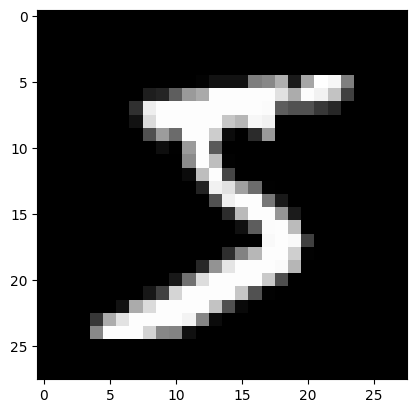

lable is : 5
before : lable is : 5
after : lable is : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9072 - loss: 0.3375 - val_accuracy: 0.9482 - val_loss: 0.1866
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9559 - loss: 0.1566 - val_accuracy: 0.9614 - val_loss: 0.1318
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9691 - loss: 0.1075 - val_accuracy: 0.9671 - val_loss: 0.1100
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9762 - loss: 0.0821 - val_accuracy: 0.9697 - val_loss: 0.1008
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9816 - loss: 0.0629 - val_accuracy: 0.9718 - val_loss: 0.0947
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9852 - loss: 0.0514 - val_accuracy: 0.9727 - val_loss: 0.0855
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9883 - loss: 0.0419 - val_accuracy: 0.9724 - val_loss: 0.0946
Epoch 8/10
750/750

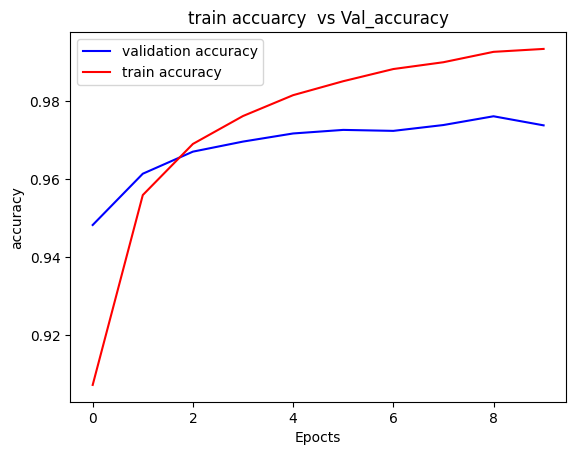

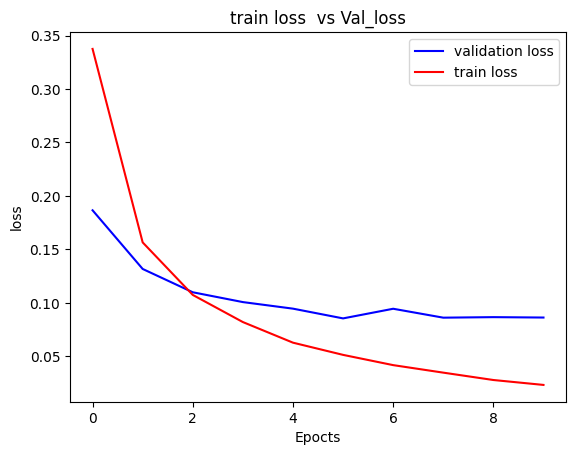

In [52]:
#load the data
(X_train,Y_train),(x_test,y_test) = mnist.load_data()
print(X_train.shape)
print(y_test.shape)  
print(X_train[0])  
plt.imshow(X_train[0],cmap='gray')
plt.show()
print(f"lable is : {Y_train[0]}")
X_train = X_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

#to_categorical
print(f"before : lable is : {Y_train[0]}")
Y_train = to_categorical(Y_train)
print(f"after : lable is : {Y_train[0]}")

y_test = to_categorical(y_test)

#architecture
model = Sequential()
model.add(Flatten(input_shape=(28,28))) #1st layer
model.add(Dense(128,activation='relu')) #128 neurons
model.add(Dense(10,activation='softmax')) #10 neurons

#compiling the model
model.compile(optimizer='Adam' , loss = 'categorical_crossentropy' , metrics= ['accuracy'])

#train
result = model.fit(X_train,Y_train,epochs=10,batch_size=64,validation_split= 0.2 ) #64 image are sent each time 

#evaluate 
loss , accuracy = model.evaluate(x_test,y_test)
print(f"test loss : {loss}")
print(f"test accuracy : {accuracy}")
print(result.history.keys())
print(result.history.values())

#visulation 
plt.plot(result.history['val_accuracy'] , label = "validation accuracy" ,color= 'blue' )
plt.plot(result.history['accuracy'] , label = "train accuracy "  , color = "red")
plt.title("train accuarcy  vs Val_accuracy")
plt.xlabel('Epocts')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(result.history['val_loss'] , label = "validation loss" ,color= 'blue' )
plt.plot(result.history['loss'] , label = "train loss "  , color = "red")
plt.title("train loss  vs Val_loss")
plt.xlabel('Epocts')
plt.ylabel('loss')
plt.legend()
plt.show()